In [1]:
from graph_drawer import get_nx_representation, draw_graph
from dataset import PacketsDatapipe, get_labels
import matplotlib.pyplot as plt
import numpy as np

In [2]:
packet_list_dataset_location = r'App\src\build_release\own\packet_list_dataset'
size_delay_dataset_location = r'App\src\build_release\own\size_delay_dataset'
size_delay_dataset = PacketsDatapipe(size_delay_dataset_location, batch_size=1, balanced=True)[0]
packet_list_dataset = PacketsDatapipe(packet_list_dataset_location, batch_size=1, balanced=True)[0]

0 (idle): 3894
1 (web): 3224
2 (video): 86477
4 (file-transfer): 13012
5 (online-game): 6984
Balanced to: 3224
0 (idle): 20098
1 (web): 22494
2 (video): 437690
3 (voip): 49210
4 (file-transfer): 68139
5 (online-game): 63544
Balanced to: 20098


# Draw size delay representaion

Label: video
Label: file-transfer
Label: web
Label: idle
Label: video


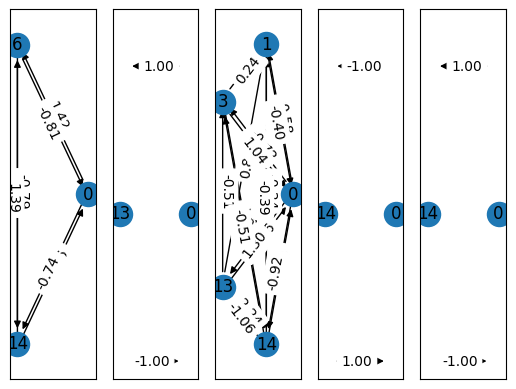

DiGraph with 2 nodes and 2 edges


In [3]:
fig, axs = plt.subplots(1, 5)
for i in range(5):
    graph = next(iter(size_delay_dataset))
    print(f'Label: {get_labels()[graph.y.item()]}')
    G = get_nx_representation(graph.x, graph.edge_index)
    draw_graph(G, axs[i])

plt.show()
print(G)

# Draw packet list representaion

Label: voip


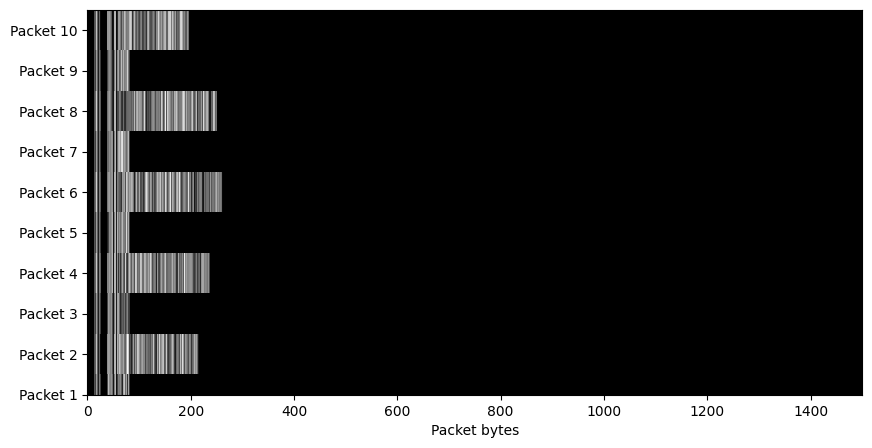

In [40]:
graph = next(iter(packet_list_dataset))
print(f'Label: {get_labels()[graph.y.item()]}')

bw_values = (graph.x.numpy() * 255).astype(int)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Iterate through each row in the tensor
for i in range(bw_values.shape[0]):
    vector = bw_values[i, :]
    
    # Create a colored strip for each vector
    color_strip = np.zeros((1, bw_values.shape[1], 3), dtype=np.uint8)
    color_strip[:, :, 0] = vector
    color_strip[:, :, 1] = vector
    color_strip[:, :, 2] = vector
    
    # Display the colored strip
    ax.imshow(color_strip, extent=[0, bw_values.shape[1], i, i + 1], aspect='auto')

# Set y-axis ticks and labels
ax.set_yticks(np.arange(0.5, bw_values.shape[0], 1))
ax.set_yticklabels([f"Packet {i+1}" for i in range(bw_values.shape[0])])

# Set x-axis label
ax.set_xlabel('Packet bytes')

# Show the plot
plt.show()
